<a href="https://colab.research.google.com/github/linhvuueh/-17-3---31241023210----VU-PHUONG-LINH/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir='/content/drive/MyDrive/NĂM NHẤT/AI/CNN/FOOD'
img_width,img_height=128,128
batch_size=32

train_datagen=ImageDataGenerator(
    rescale=1.0/225,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(img_width,img_height,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(27,activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
epochs=20
history=model.fit(train_generator,epochs=epochs, validation_data=validation_generator)


Found 383 images belonging to 27 classes.
Found 86 images belonging to 27 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 27)                  │           3,483 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,308,123 (12.62 MB)

 Trainable params: 3,308,123 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.0369 - loss: 3.3733 - val_accuracy: 0.0698 - val_loss: 3.2229
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.0597 - loss: 3.2434 - val_accuracy: 0.0930 - val_loss: 3.1459
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.1095 - loss: 3.1531 - val_accuracy: 0.1977 - val_loss: 3.1211
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.1231 - loss: 3.0733 - val_accuracy: 0.1860 - val_loss: 2.9053
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.1480 - loss: 2.9635 - val_accuracy: 0.2442 - val_loss: 2.8006
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.1376 - loss: 2.8408 - val_accuracy: 0.2442 - val_loss: 2.6404
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.2096 - loss: 2.7274 - val_accuracy: 0.1977 - val_loss: 2.5758
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.1731 - loss: 2.7638 - val_accuracy: 0.2907 - val_loss:

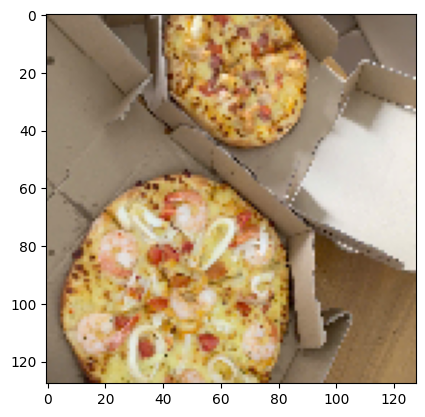

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Predicted Class: Class4_Pizza


In [16]:
from keras.utils import load_img
import numpy as np
path ='/content/z6429039628183_87b3c0ad8347f3319cdbd5c1caec2705.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Predicted Class: {class_labels[prediction]}")

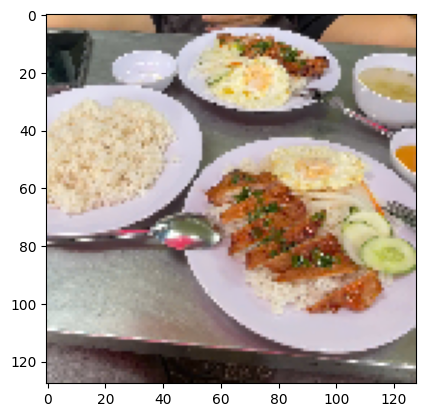

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Class: Class2_Comtam


In [20]:
from keras.utils import load_img
import numpy as np
path ='/content/z6429039650735_fcf704f3694573ca1bb3b73953290478.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Predicted Class: {class_labels[prediction]}")

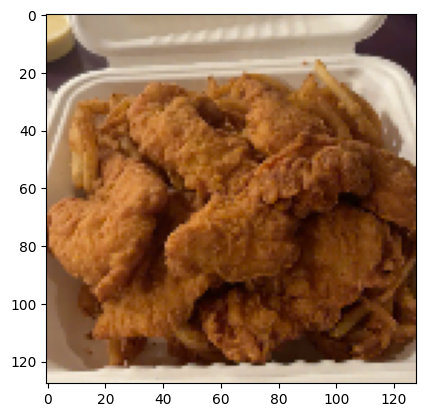

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Class: Class6_Duiga


In [25]:
from keras.utils import load_img
import numpy as np
path ='/content/sample_data/z6429074956156_725e193c117067d0d8a407be0cc7dcc5.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Predicted Class: {class_labels[prediction]}")

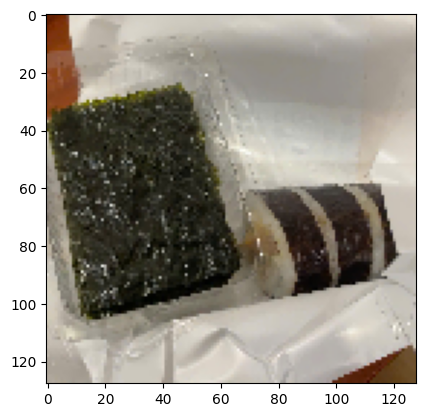

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Class: Class3_Kimbap


In [31]:
from keras.utils import load_img
import numpy as np
path ='/content/z6429118128132_fc243d5820a21f4fe120bc7c05f689e1.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Predicted Class: {class_labels[prediction]}")

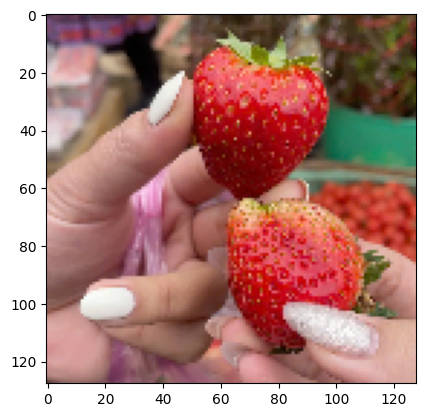

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted Class: Class31_Dau


In [35]:
from keras.utils import load_img
import numpy as np
path ='/content/sample_data/z6429118113873_0539f3329444ff6b2001b09c96334c39.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Predicted Class: {class_labels[prediction]}")

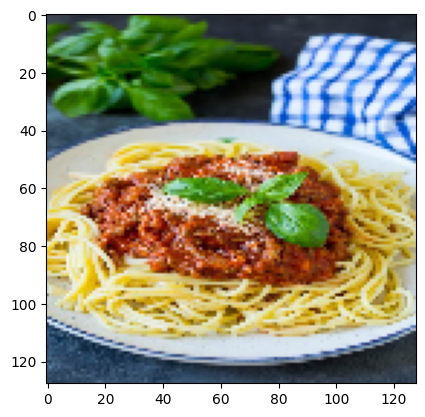

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Class: Class16_Myy


In [50]:
from keras.utils import load_img
import numpy as np
path ='/content/sample_data/f27f60787bc293ad798c61536f81b281.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Predicted Class: {class_labels[prediction]}")

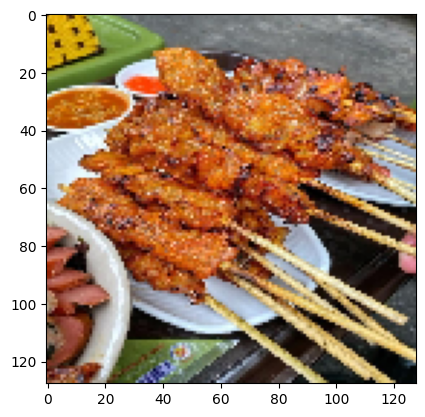

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted Class: Class14_thitnuong


In [53]:
from keras.utils import load_img
import numpy as np
path ='/content/sample_data/ee546ca5f630e9892f7fba43ff2448f1.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Predicted Class: {class_labels[prediction]}")

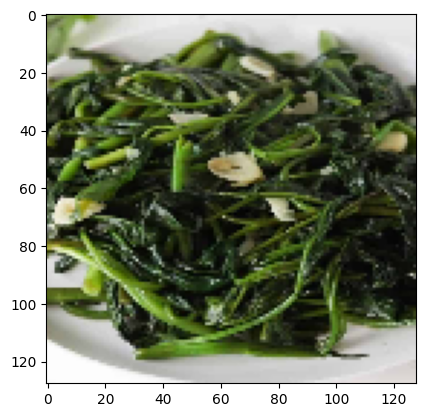

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted Class: Class12_Raumuong


In [62]:
from keras.utils import load_img
import numpy as np
path ='/content/sample_data/f94223f281e0710b4adbc2e60b222692.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Predicted Class: {class_labels[prediction]}")

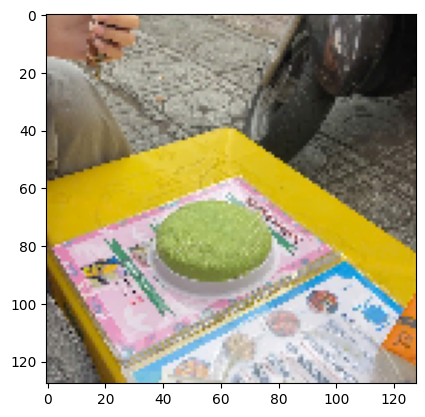

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted Class: Class21_Banhcrepe


In [66]:
from keras.utils import load_img
import numpy as np
path ='/content/z6429550173221_0bc5e78f7a103f7eb5ab3488f43deecb.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Predicted Class: {class_labels[prediction]}")

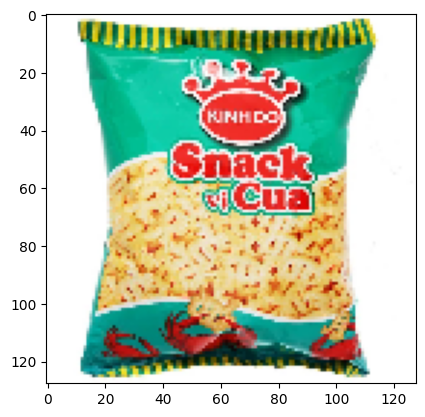

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Class: Class19_snack


In [73]:
from keras.utils import load_img
import numpy as np
path ='/content/Kinh-Do-Snack-vi-cua-29g.jpg'
img = load_img(path, target_size=(128, 128))
plt.imshow(img)
plt.show()
img_array = np.array(img)
img_array = img_array.reshape((1, 128, 128, 3))
prediction = np.argmax(model.predict(img_array))
class_labels ={v:k for k,v in train_generator.class_indices.items()}
print(f"Predicted Class: {class_labels[prediction]}")